 # Cvičení 12. Neparametrické testy, testy dobré shody
 ## Michal Béreš, Martina Litschmannová, Adéla Vrtková

# Testování shody rozdělení pravděpodobnosti diskrétní NV (o konečném počtu hodnot) - test dobré shody
- testujeme zda naměřená data (jejich relativní četnosti) souhlasí s nějakým konkrétním rozdělením (tedy jeho pravděpodobnostmi)
- testujeme pomocí $\chi^2$ testu dobré shody 
- předpoklady testu: (POZOR týkají se předpokládaných četností - tedy těch které bychom sledovali pokud by naměřená data byla 100% dle rozdělení v hypotéze)
    - Očekávané četnosti ≥ 2, 
    - alespoň 80% očekávaných četností > 5 
- testová statistika (ta která má $\chi^2$ rozdělení) je $G = \sum_{i = 1}^k (O_i - E_i)^2 / E_i$
- rozdělení ma stupeň volnosti $df = k - 1 - h$
    - k je počet možností
    - h je počet odhadovaných parametrů (toto se týká neúplně specifikovaných testů)

In [ ]:
# ukázka viz příklad 1


## Test dobré shody pro spojitou náhodnou veličinu (případně diskrétní o nekonežném počtu hodnot)
- musíme převést na tabulku s konečným počtem hodnot
- u diskrétní (např. poison) shlukneme od určitého  počtu kolonek např. 4,5,6,... na "4 a více"
- u spojité vyrobíme sérii intervalů a koukáme se kolik hodnot spadne do daného intervalu
    - např.: (-$\infty$, 3), <3, 4), ..., <10, $\infty$)
    - pak musíme pro očekávané rozdělení napočítat pro každý interval kolik % dat do nich patří, čímž získáme tabulku očekávaných pravděpodobností
- dále pokračujeme jako u předchozího
- pro testování normality rozdělení existuje funkce pearson.test(data) z balíčku nortest

In [ ]:
# ukázka příklady 2,3,4


# Kontingenční tabulky
- tabulky obsahující data v závislosti na dvou faktorech
- jeden z faktorů je z pravidla nezávislá proměnná u které sledujeme, zda má vliv na druhý faktor (závislá proměnná)
    - nezávislá proměnná je zpravidla v řádcích
    - závislá je zpravidla ve sloupcích
- pozor celé testování zkoumá korelaci, nikoliv kauzalitu! Kauzalita se dá posoudit "expertním" zhodnocením
    - statistický závěr: existuje statisticky významná závislost mezi nezávislou a závislou proměnnou (korelace)
    - expertní posouzení: nezávislá proměnná statisticky významně ovlivňuje závislou proměnnou (kauzalita)

## Vizualizace kontingenční tabulky
- vizualizace např. pomocí funkce barplot
    - pozor na to co jsou řádky a sloupce, vždy chceme aby jednotlivé dělené sloupce byly přes nezávislé proměnné (každý sloupec pro jednu hodnotu nezávislé proměnné)
    - beside = T určuje zda chceme přilehlé sloupce sloučit do jednoho děleného sloupce, či ne
- preferovaná vizualizace pomocí mozaikového grafu mosaicplot
    - totéž co u barplotu, spojené sloupce musí být přes nezávislé proměnné

In [ ]:
# ukázky v příkladech 5,6,7


## Míry závislosti v koningenční tabulce
- Koeficient korelace CC
- Korigovaný koeficient korelace CCcor
- Cramerův koeficient V
    - tento budeme používat především
    - funkce cramersV(kont.tab) z balíčku lsr

In [ ]:
# ukázky v příkladech 5,6,7


## Test závislosti v kontingenční tabulce
- $H_0:$ neexistuje závislost mezi nezávislou (např. je kouřák) a závislou (např. trpí onemocněním) proměnnou
- $H_A: \neg H_0$
- funkce chisq.test(kont.tab)
    - předpoklady: Očekávané četnosti ≥ 2, alespoň 80% očekávaných četností > 5
    - očekávané četnosti se dají zjistit z chisq.test(kont.tab)\$expected

# Asociační tabulky
- jedná se o speciální případ kontingenční tabulky
- má vždy právě 2 možnosti pro závislou a právě 2 možnosti pro nezávislou proměnnou

## Povinný tvar asociační tabulky
- řádky označují možnosti nezávislé proměnné
    - první řádek je takzvaná exponovaná část populace (ta vystavena jevu který zkoumáme - např. kuřáci poku zkoumáme vliv kouření)
    - druhý řádek je neexponovaná část populace
- sloupce označují možnosti závislé proměnné
    - první sloupec označuje výskyt zkoumaného jevu (např. výskyt nemoci, chyba výrobku, ...)
    - druhý sloupec označuje zbytek - bez výskytu zkoumaného jevu

## Relativní riziko a poměr šancí
- Relativní riziko a poměr šancí podávají stejnou informaci, pouze v jiném formátu
- všechny bodové IO se spočtou pomocí funkce epi.2by2(asoc.tab) z balíčku epiR
    - funkce bere jako vstup asociační tabulku, která musí být ve správném formátu!

### Relativní riziko
- značíme $RR$
- jedná se o poměr rizika (pravděpodobnost výskytu zkoumaného jevu) u exponované a neexponované populace
    - pokud je roven 1 tak to značí stejné pravděpodobnosti výskytu u exponované i u neexponované
    - pokud je větší než 1 pak exponovaná polulace má větší pravděpodobnost výskytu
    - pokud je menší než 1 pak exponovaná populace má menší pravděpodobnost výskytu
- bodový odhad $\hat{RR}$ se spočte jako poměr rel. četností zkoumaného jevu u exponované a neexponované populace
- funkce epi.2by2 dodá intervalové odhady
- pokud IO neobsahuje hodnotu 1 pak existuje statisticky významná závislost mezi závislou a nezávislou proměnnou

### Poměr šancí
- značíme $OR$
- jedná se o poměr šancí (šance výskytu zkoumaného jevu) u exponované a neexponované populace
    - pokud je roven 1 tak to značí stejné šance výskytu u exponované i u neexponované
    - pokud je větší než 1 pak exponovaná polulace má větší šanci výskytu
    - pokud je menší než 1 pak exponovaná populace má menší šanci výskytu
- bodový odhad $\hat{OR}$ se spočte jako poměr šancí (výběrových) zkoumaného jevu u exponované a neexponované populace
- funkce epi.2by2 dodá intervalové odhady
- pokud IO neobsahuje hodnotu 1 pak existuje statisticky významná závislost mezi závislou a nezávislou proměnnou

In [ ]:
# ukázka v příkladu 7


# Příklady (testy dobré shody)
## Příklad 1.
Hodilo se 6 000 krát hrací kostkou a zaznamenaly se počty padlých ok.<br>
Je možné na základě příslušného testu na hladině významnosti 0,05 spolehlivě tvrdit, že kostka
je „falešná“, tj. že pravděpodobnosti všech čísel na kostce nejsou stejné?<br>
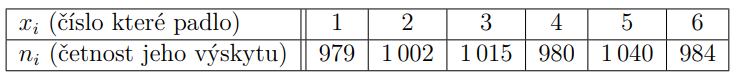

In [ ]:
# H0: Kostka je férová. (tedy všechny pravděpodobnosti jsou 1/6)
# Ha: Kostka není férová. (negace H0)

x <- c(1, 2, 3, 4, 5, 6)
n.obs <- c(979, 1002, 1015, 980, 1040, 984)
p.exp <- c(1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6)
n.exp <- 6000 * p.exp
n.exp # nutno zkontrolovat předpoklady testu
# Všechny očekávané četnosti jsou větší než 5.


In [ ]:
x.obs <- sum(((n.obs - n.exp)^2) / n.exp)
x.obs


In [ ]:
p.hodnota <- 1 - pchisq(x.obs, 5)
p.hodnota

# Na hladině významnosti 0,05 nezamítáme HO (p-hodnota = 0,711,
# Chí-kvadrát test nezávislosti, df = 5).


## Příklad 2.
Výrobní firma odhaduje počet poruch určitého zařízení během 100 hodin pomocí Poissonova
rozdělení s parametrem 1,2. Zaměstnanci zaznamenali pro kontrolu skutečné počty poruch
celkem ve 150 100hodinových intervalech (výsledky jsou uvedeny v tabulce). Ověřte čistým testem významnosti, zda má počet poruch daného zařízení během 100 hodin skutečně Poissonovo
rozdělení s parametrem λt = 1,2.<br>
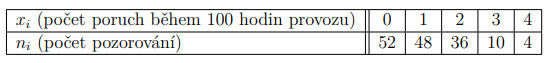

In [ ]:
# Úplně specifikovaný test

# H0: Počet poruch během 100 hodin provozu lze modelovat
#     Poissonovým rozdělením s parametrem 1,2.
# Ha: Počet poruch během 100 hodin provozu nelze modelovat
#     Poissonovým rozdělením s parametrem 1,2.

x <- c(0, 1, 2, 3, 4)
n.obs <- c(52, 48, 36, 10, 4)


In [ ]:
p.exp <- dpois(x, 1.2)
p.exp[5] <- 1 - sum(p.exp[1:4])
p.exp
sum(p.exp)


In [ ]:
n.exp <- 150 * p.exp
n.exp # nutno zkontrolovat předpoklady testu
# 4 z 5 očekávaných četnosti, tj. 80%, jsou větší než 5.


In [ ]:
x.obs <- sum(((n.obs - n.exp)^2) / n.exp)
x.obs


In [ ]:
p.hodnota <- 1 - pchisq(x.obs, 4)
p.hodnota

# Na hladině významnosti 0,05 nezamítáme HO (p-hodnota = 0,590,
# Chí-kvadrát test nezávislosti, df = 4).


## Příklad 3.
Zaměstnanci zaznamenali pro kontrolu počty poruch celkem ve 150 100hodinových intervalech
(výsledky jsou uvedeny v tabulce). Ověřte čistým testem významnosti, zda má počet poruch
daného zařízení během 100 hodin skutečně Poissonovo rozdělení.<br>
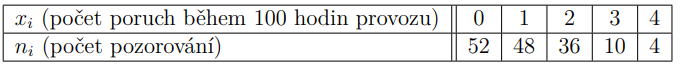

In [ ]:
# Neúplně specifikovaný test

# H0: Počet poruch během 100 hodin provozu lze modelovat
#     Poissonovým rozdělením.
# Ha: Počet poruch během 100 hodin provozu nelze modelovat
#     Poissonovým rozdělením.

x <- c(0, 1, 2, 3, 4)
n.obs <- c(52, 48, 36, 10, 4)

lambda.t <- weighted.mean(x, n.obs) # odhad parametru Poissonova rozdělení
lambda.t


In [ ]:
p.exp <- dpois(x, lambda.t)
p.exp[5] <- 1 - sum(p.exp[1:4])
p.exp
sum(p.exp)


In [ ]:
n.exp <- 150 * p.exp
n.exp # nutno zkontrolovat předpoklady testu
# 4 z 5 očekávaných četnosti, tj. 80%, jsou větší než 5.


In [ ]:
x.obs <- sum(((n.obs - n.exp)^2) / n.exp)
x.obs


In [ ]:
p.hodnota <- 1 - pchisq(x.obs, 3)
p.hodnota

# Na hladině významnosti 0,05 nezamítáme HO (p-hodnota = 0,491,
# Chí-kvadrát test nezávislosti, df = 3).


## Příklad 4. 
Na dálnici byly v průběhu několika minut měřeny časové odstupy (s) mezi průjezdy jednotlivých vozidel. Zjištěné hodnoty těchto odstupů jsou zaznamenány v souboru dalnice.xlsx. Ověřte, zda se jedná o data z normálního rozdělení (použijte test dobré shody).

In [ ]:
# automatický test dobré shody ze spojitých dat

dalnice <- readxl::read_excel("data/neparametricke_hypotezy.xlsx", sheet = 2)
colnames(dalnice) <- "hodnoty"
head(dalnice)


In [ ]:
mu <- mean(dalnice$hodnoty)
sigma <- sd(dalnice$hodnoty)
mu
sigma


In [ ]:
# generování hodnot pro osu x
xfit <- seq(from = -20, to = 30, length = 100)
# generování hodnot pro osu y
yfit <- dnorm(xfit, mean = mu, sd = sigma)

hist(dalnice$hodnoty, freq = FALSE, xlim = c(-20, 30))
# do posledního grafu přidání křivky na základě výše vygenerovaných hodnot
lines(xfit, yfit, col = "black", lwd = 2)


In [ ]:
# install.packages("nortest")


In [ ]:
# H0: Rozestupy mezi vozidly lze modelovat normálním rozdělením.
# Ha: Rozestupy mezi vozidly nelze modelovat normálním rozdělením.

nortest::pearson.test(dalnice$hodnoty)


In [ ]:
# Určení počtu stupňů volbnosti
pom <- nortest::pearson.test(dalnice$hodnoty, n.classes = 5)
attributes(pom)


In [ ]:
pom$method
pom$n.classes
pom$df
pom$p.value

# Na hladině významnosti 0,05 lze zamítnout HO (p-hodnota << 0,001,
# Chí-kvadrát test dobré shody, df = 12).


In [ ]:
# test co už znáte
shapiro.test(dalnice$hodnoty)


# Příklady na kontingenční a asociační tabulky
## Příklad 5.
Rozhodněte na základě datového souboru experimentovani-s-telem.xls (Dudová, J. - Experimentování s tělem (výsledky průzkumu), 2013. Dostupné online na http://experimentovani-stelem.vyplnto.cz), zda existuje souvislost mezi pohlavím respondentů a tím, zda mají tetování. Pro posouzení míry kontingence použijte Cramerovo V.

In [1]:
tet <- readxl::read_excel("data/neparametricke_hypotezy.xlsx", sheet = 3)
head(tet)


New names:
• `Pokud ano, kde?` -> `Pokud ano, kde?...9`
• `Pokud ano, kde?` -> `Pokud ano, kde?...11`


ID respondenta,UID respondenta,Datum vyplnění,Délka vyplňování (s),QS parametry,Vaše pohlaví?,Váš věk?,Máte piercing (včetně náušnic)?,"Pokud ano, kde?...9",Máte tetování?,⋯,"Pokud ano, které? - LSD","Pokud ano, které? - houbičky (psilocybin)","Pokud ano, které? - heroin","Pokud ano, které? - opium","Pokud ano, které? - crack","Pokud ano, které? - kokain","Pokud ano, které? - pervitin","Pokud ano, které? - rozpouštědla (toluen, lepidla, barvy)","Pokud ano, které? - vlastní odpověď",Máte/chtěli byste ozdobit své tělo skarifikací? (skarifikace = vyřezávání či vypalování obrazců/slov do kůže)
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2280997,2013-04-20 21:31:41,33,NA,žena,30,ano,uši,ne,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,ne
2,2281002,2013-04-20 21:32:35,48,NA,žena,20,ano,v uších,ne,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,ne
3,2281003,2013-04-20 21:32:37,94,NA,žena,20,ano,"uši, pupík",ne,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,ne
4,2281006,2013-04-20 21:33:39,44,NA,muž,21,ne,NA,ne,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,ne
5,2281008,2013-04-20 21:34:01,40,NA,žena,23,ano,uši,ne,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,ne
6,2281010,2013-04-20 21:34:39,36,NA,žena,20,ne,NA,ne,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,ne


In [2]:
tet <- tet[, c(6, 10)]
colnames(tet) <- c("pohlavi", "tetovani")
head(tet)


pohlavi,tetovani
<chr>,<chr>
žena,ne
žena,ne
žena,ne
muž,ne
žena,ne
žena,ne


In [3]:
# Preprocessing
# Varianty kat. proměnných (faktorů) je nutné uspořádat a pojmenovat tak,
# jak mají být uspořádány a pojmenovány v kont. tabulce


kont.tab <- table(tet$pohlavi, tet$tetovani)
kont.tab


      
       ano  ne
  muž   13 194
  žena  58 331

In [4]:
colnames(kont.tab) <- c("má tetování", "nemá tetování")
kont.tab


      
       má tetování nemá tetování
  muž           13           194
  žena          58           331

In [5]:
# Explorační analýza
prop.table(kont.tab) # sdružené relativní četnosti
prop.table(kont.tab, 1) # řádkové relativní četnosti
prop.table(kont.tab, 2) # sloupcové relativní četnosti


      
       má tetování nemá tetování
  muž   0.02181208    0.32550336
  žena  0.09731544    0.55536913

      
       má tetování nemá tetování
  muž   0.06280193    0.93719807
  žena  0.14910026    0.85089974

      
       má tetování nemá tetování
  muž    0.1830986     0.3695238
  žena   0.8169014     0.6304762

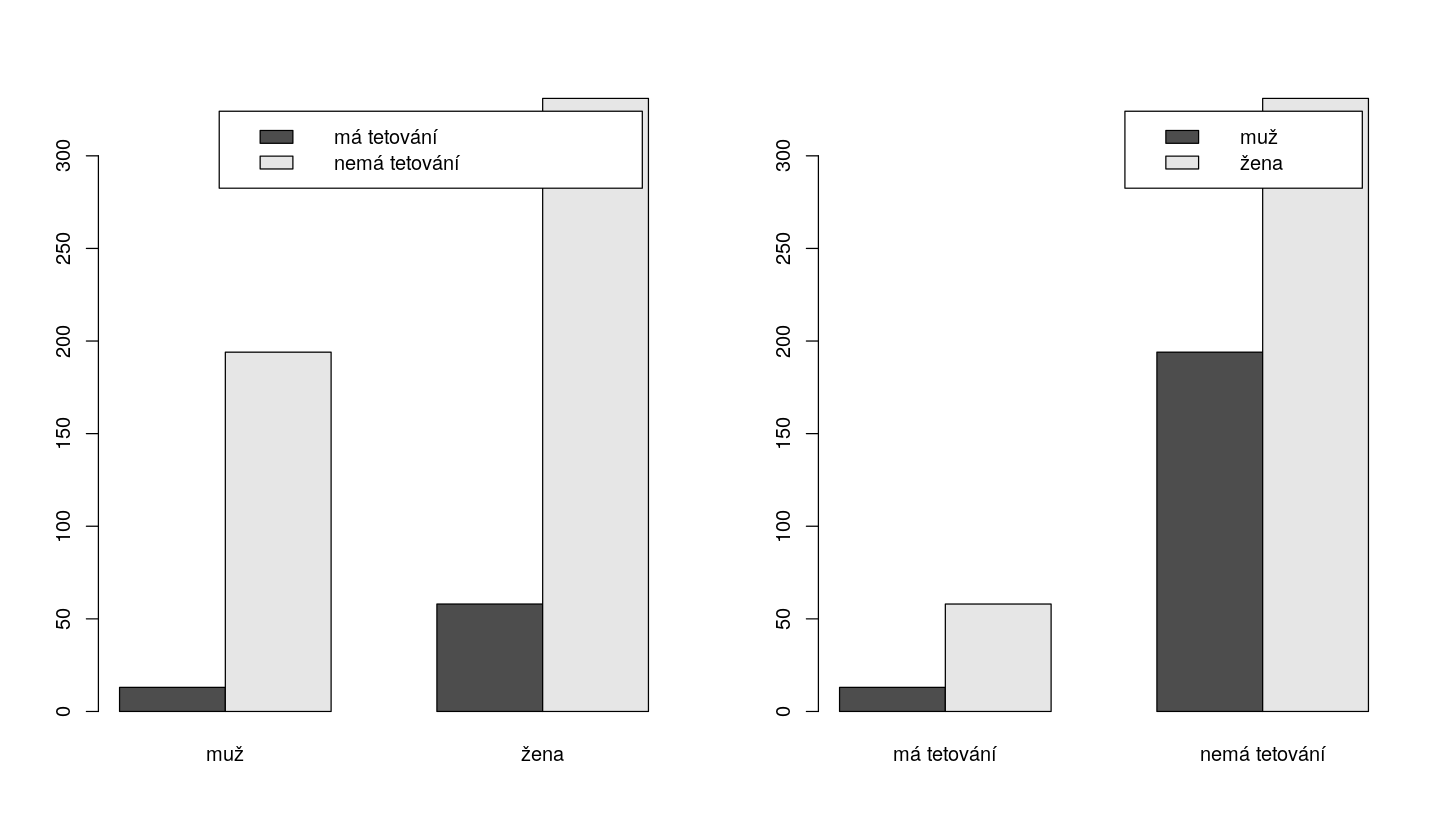

In [6]:
# Vizualizace ve standardním R
# Shlukový sloupcový graf
# srovnejte grafy, který z grafů je pro prezentaci daných dat vhodnější

options(repr.plot.width = 12) # šířka grafů v Jupyteru
par(mfrow = c(1, 2)) # matice grafů 1x2

barplot(t(kont.tab),
        legend = colnames(kont.tab),
        beside = TRUE
)

barplot(kont.tab,
        legend = rownames(kont.tab),
        beside = TRUE
)


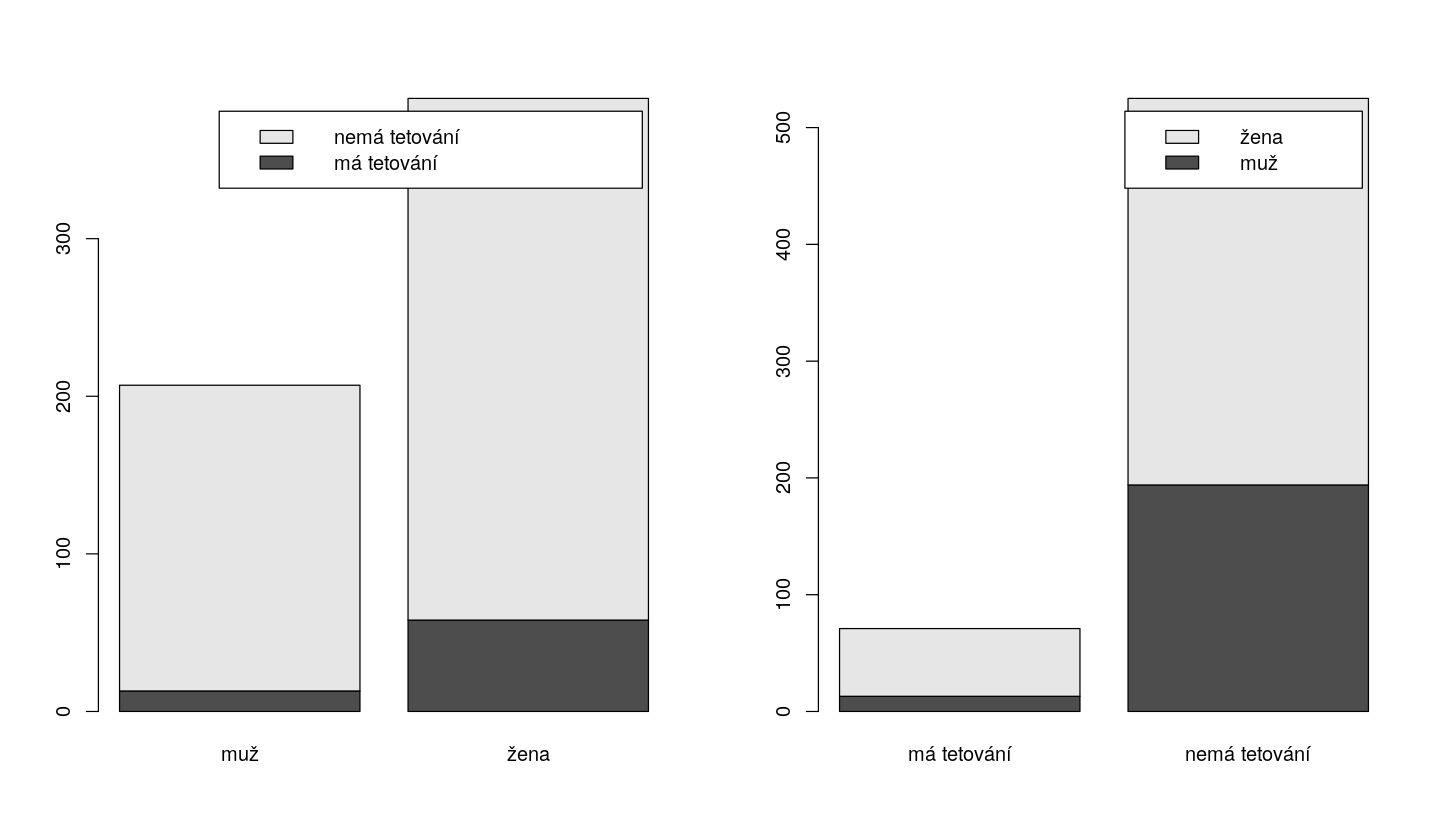

In [7]:
# Skládaný sloupcový graf

options(repr.plot.width = 12) # šířka grafů v Jupyteru
par(mfrow = c(1, 2)) # matice grafů 1x2

barplot(t(kont.tab),
        legend = colnames(kont.tab)
)

barplot(kont.tab,
        legend = rownames(kont.tab)
)


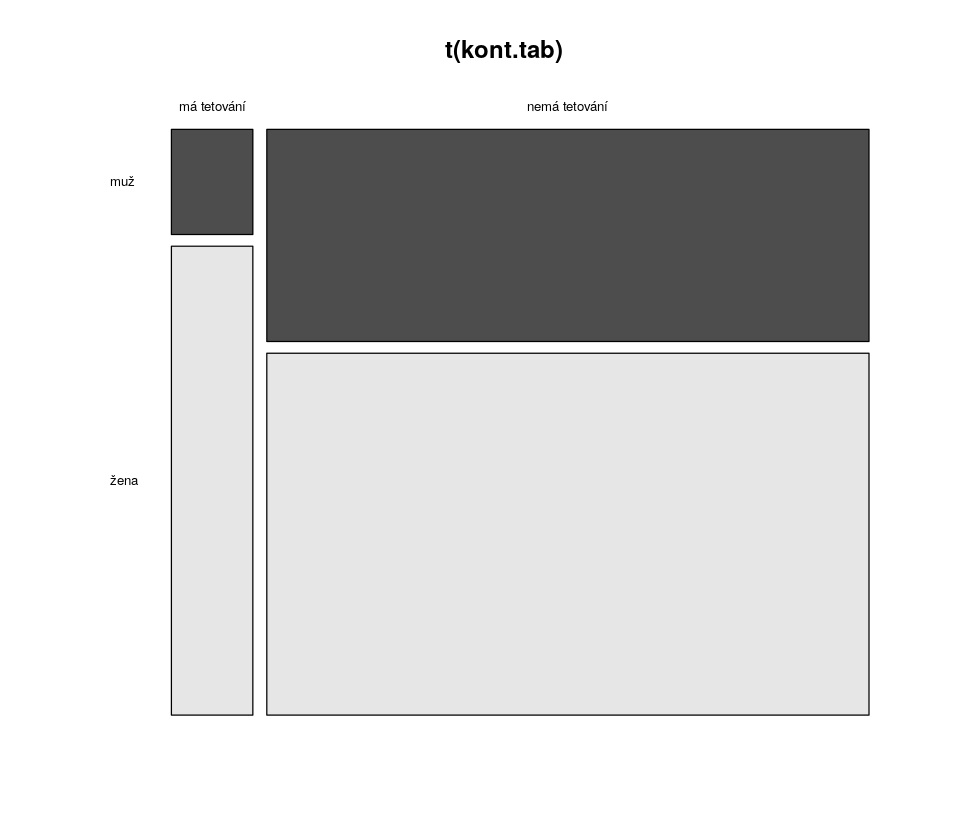

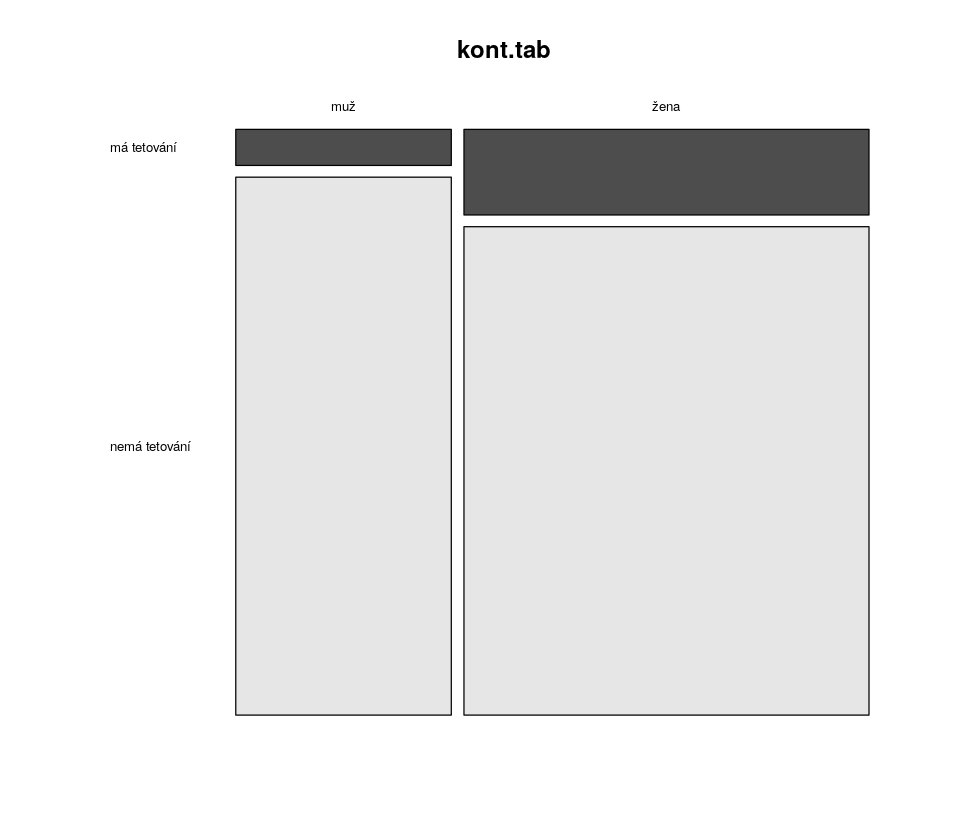

In [8]:
# Mozaikový graf

options(repr.plot.width = 8) # šířka grafů v Jupyteru

mosaicplot(t(kont.tab),
    las = 1, # otočení popisků osy y
    color = gray.colors(2)
)

# srovnejte, který z grafů je pro prezentaci daných dat vhodnější
mosaicplot(kont.tab,
    las = 1,
    color = gray.colors(2)
)


In [ ]:
# install.packages("lsr")


In [9]:
# Výpočet Cramerova V ####
lsr::cramersV(kont.tab)


[1] 0.1213998

In [10]:
# Test nezávislosti v kontingenční tabulce

# H0: Data jsou nezávislá -> to jestli je jedinec muž nebo žena
# neovlivní jeho pravděpodobnost, že budemít tetování
# HA: negace H0 (existuje závislost)

pom <- chisq.test(kont.tab)
attributes(pom)


$names
[1] "statistic" "parameter" "p.value"   "method"    "data.name" "observed" 
[7] "expected"  "residuals" "stdres"   

$class
[1] "htest"

In [11]:
pom$expected # Nutné pro ověření předpokladů
# Všechny očekávané četnosti jsou větší než 5.


,má tetování,nemá tetování
muž,24.6594,182.3406
žena,46.3406,342.6594


In [12]:
pom

# Na hladině významnosti 0,05 lze zamítnout HO (p-hodnota = 0,003,
# Chí-kvadrát test dobré shody, df = 1).
# Pozorovanou závislost lze hodnotit jako slabou (Cramerovo V = 0,121).



	Pearson's Chi-squared test with Yates' continuity correction

data:  kont.tab
X-squared = 8.7838, df = 1, p-value = 0.003039


## Příklad 6.
Pro diferencovaný přístup v personální politice potřebuje vedení podniku vědět, zda spokojenost v práci závisí na tom, jedná-li se o pražský závod či závody mimopražské. Výsledky šetření jsou v následující tabulce. Zobrazte data pomocí mozaikového grafu a na základě testu nezávislosti v kombinační tabulce rozhodněte o závislosti spokojenosti v zaměstnání na umístnění podniku. Pro posouzení míry kontingence použijte Cramerovo V.<br>
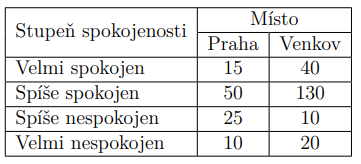

In [13]:
# Nemáme k dispozici datovou matici, tj. kont. tabulku musíme zadat "ručně"
kont.tab <- matrix(c(10, 25, 50, 15, 20, 10, 130, 40),
    nrow = 2, byrow = TRUE
)
rownames(kont.tab) <- c("Praha", "Venkov")
colnames(kont.tab) <- c(
    "velmi nespokojen", "spíše nespokojen",
    "spíše spokojen", "velmi spokojen"
)
kont.tab <- as.table(kont.tab)
kont.tab


       velmi nespokojen spíše nespokojen spíše spokojen velmi spokojen
Praha                10               25             50             15
Venkov               20               10            130             40

In [14]:
# Explorační analýza ####
prop.table(kont.tab) # sdružené relativní četnosti
prop.table(kont.tab, 1) # řádkové relativní četnosti
prop.table(kont.tab, 2) # sloupcové relativní četnosti


       velmi nespokojen spíše nespokojen spíše spokojen velmi spokojen
Praha        0.03333333       0.08333333     0.16666667     0.05000000
Venkov       0.06666667       0.03333333     0.43333333     0.13333333

       velmi nespokojen spíše nespokojen spíše spokojen velmi spokojen
Praha              0.10             0.25           0.50           0.15
Venkov             0.10             0.05           0.65           0.20

       velmi nespokojen spíše nespokojen spíše spokojen velmi spokojen
Praha         0.3333333        0.7142857      0.2777778      0.2727273
Venkov        0.6666667        0.2857143      0.7222222      0.7272727

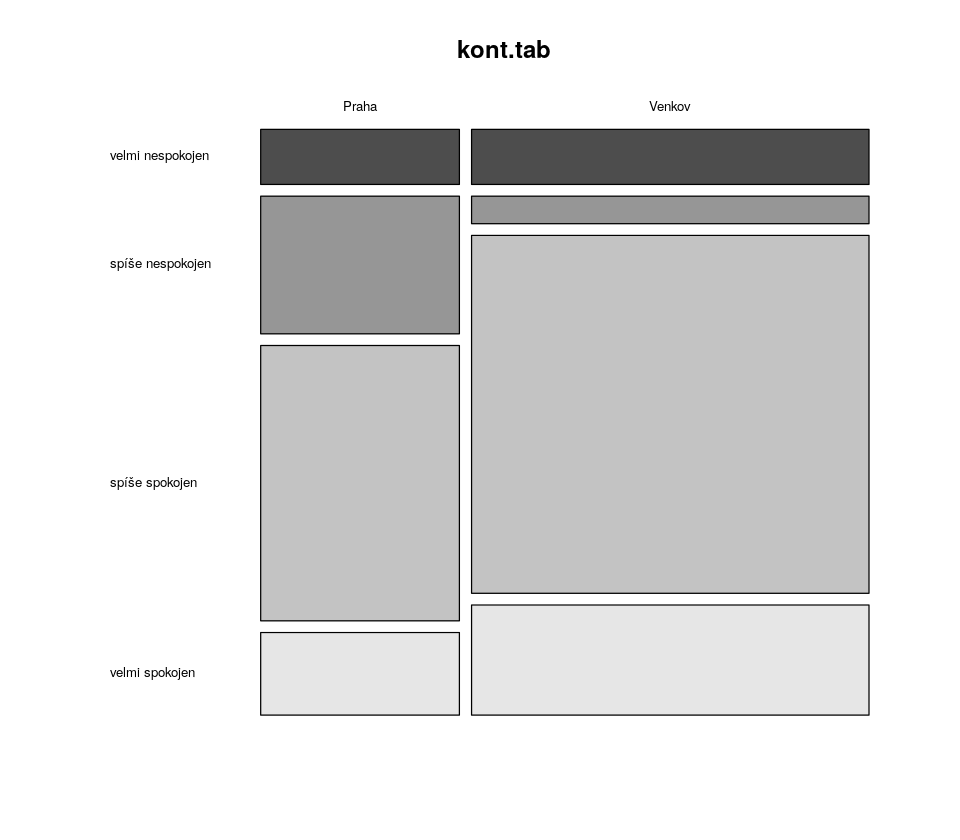

In [15]:
# Vizualizace ve standardním R
# Mozaikový graf
mosaicplot(kont.tab,
    las = 1, # otočení popisků osy y o 90
    color = gray.colors(4)
)


In [16]:
# Cramerovo V
lsr::cramersV(kont.tab)


[1] 0.2958954

In [17]:
# H0: Mezi spokojenosti v práci a umístěním podniku neexistuje souvislost.
# Ha: Mezi spokojenosti v práci a umístěním podniku existuje souvislost.

# Chí-kvadrát test nezávislosti v kontingenční tabulce ####
pom <- chisq.test(kont.tab)
pom$expected
# Všechny očekávané četnosti jsou větší než 5.


,velmi nespokojen,spíše nespokojen,spíše spokojen,velmi spokojen
Praha,10,11.66667,60,18.33333
Venkov,20,23.33333,120,36.66667


In [18]:
pom

# Na hladině významnosti 0,05 lze zamítnout HO (p-hodnota << 0,001,
# Chí-kvadrát test dobré shody, df = 3).
# Pozorovanou závislost lze hodnotit jako středně silnou (Cramerovo V = 0,296)



	Pearson's Chi-squared test

data:  kont.tab
X-squared = 26.266, df = 3, p-value = 8.388e-06


## Příklad 7. (Asociační tabulka)
V letech 1965 až 1968 bylo v kohortové studii kardiovaskulárních onemocnění v rámci „Honolulu Heart Program“ zahájeno sledování 8 006 mužů, z nichž 7 872 nemělo při zahájení studie v anamnéze mrtvici (apoplexii). Z tohoto počtu bylo 3 435 kuřáků a 4 437 nekuřáků. Při jejich sledování po dobu 12 let dostalo mrtvici 171 mužů ve skupině kuřáků a 117 mužů ve skupině nekuřáků. 
#### a) 
Zapište zjištěné výsledky do asociační tabulky.

In [19]:
kont.tab <- matrix(c(171, 3264, 117, 4320), nrow = 2, byrow = TRUE)
rownames(kont.tab) <- c("kuřák", "nekuřák")
colnames(kont.tab) <- c("ano", "ne")
kont.tab


,ano,ne
kuřák,171,3264
nekuřák,117,4320


In [20]:
# doplnění tabulky absolutních četností
kont.tab.full <- matrix(rep(0, 9), nrow = 3, ncol = 3)
rownames(kont.tab.full) <- c("kuřák", "nekuřák", "sum")
colnames(kont.tab.full) <- c("ano", "ne", "sum")

kont.tab.full[1:2, 1:2] <- kont.tab
kont.tab.full[1:2, 3] <- rowSums(kont.tab)
kont.tab.full[3, 1:2] <- colSums(kont.tab)
kont.tab.full[3, 3] <- sum(kont.tab)
kont.tab.full


,ano,ne,sum
kuřák,171,3264,3435
nekuřák,117,4320,4437
sum,288,7584,7872


In [21]:
# doplnění tabulky relativních četností
kont.tab.rel <- matrix(rep(0, 9), nrow = 3, ncol = 3)
rownames(kont.tab.rel) <- c("kuřák", "nekuřák", "sum")
colnames(kont.tab.rel) <- c("ano", "ne", "sum")

kont.tab.rel[1:2, 1:2] <- prop.table(kont.tab)
kont.tab.rel[1:2, 3] <- rowSums(kont.tab.rel[1:2, 1:2])
kont.tab.rel[3, 1:2] <- colSums(kont.tab.rel[1:2, 1:2])
kont.tab.rel[3, 3] <- sum(kont.tab.rel[1:2, 1:2])
kont.tab.rel


,ano,ne,sum
kuřák,0.02172256,0.4146341,0.4363567
nekuřák,0.01486280,0.5487805,0.5636433
sum,0.03658537,0.9634146,1.0000000


#### b)
Na základě vizuálního posouzení odhadněte vliv kouření na výskyt kardiovaskulárních onemocnění.

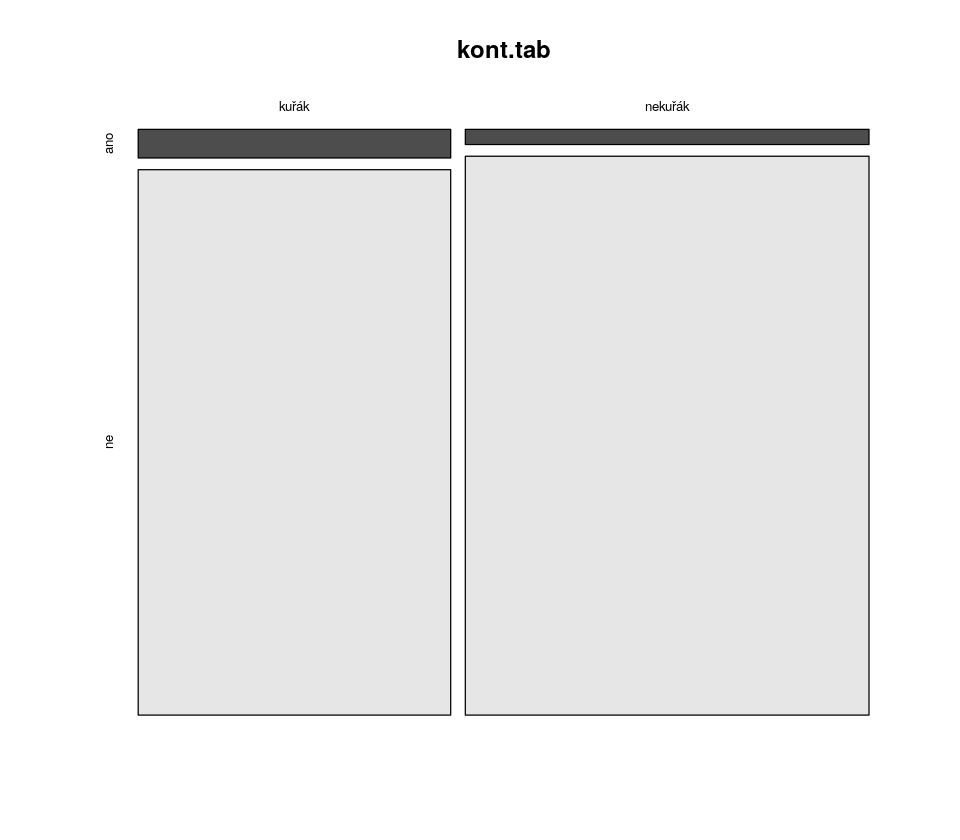

In [22]:
# Vizualizace mozaikovým grafem v základním R
mosaicplot(kont.tab,
    color = gray.colors(2)
)


In [23]:
# Výpočet Cramerova V ####
lsr::cramersV(kont.tab)

# Dle mozaikového grafu a Cramerova V (0,061) lze souvislost mezi kuřáctvím
# a výskytem apoplexie hodnotit jako velmi slabou.


[1] 0.06116363

#### c)
Určete absolutní riziko vzniku kardiovaskulárních onemocnění u kuřáků a nekuřáků.

In [24]:
# riziko = pravděpodobnost
kont.tab.full


,ano,ne,sum
kuřák,171,3264,3435
nekuřák,117,4320,4437
sum,288,7584,7872


In [25]:
# Kuřáci
# Kontrola předpokladů
p <- 171 / 3435
p


[1] 0.04978166

In [26]:
9 / (p * (1 - p))
# OK (3 435 > 190,3)


[1] 190.261

In [27]:
# Výpočet bodového a 95% Clopperova-Pearsonova intervalového odhadu
prop.test(x = 171, n = 3435)

# U kuřáku je riziko vzniku apoplexie cca 5,0 %. 95% Clopperův-Pearsonův
# intervalový odhad tohoto rizika je 4,2 % až 5,8 %.



	1-sample proportions test with continuity correction

data:  171 out of 3435, null probability 0.5
X-squared = 2783.3, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.04286263 0.05772662
sample estimates:
         p 
0.04978166 


In [28]:
# Nekuřáci
# Kontrola předpokladů
p <- 117 / 4437
p


[1] 0.02636917

In [29]:
9 / p / (1 - p)
# OK (4 437 > 350,6)


[1] 350.5514

In [30]:
# Výpočet bodového a 95% Clopperova-Pearsonova intervalového odhadu
prop.test(117, 4437)

# U nekuřáku je riziko vzniku apoplexie cca 2,6 %. 95% Clopperův-Pearsonův
# intervalový odhad tohoto rizika je 2,1 % až 3,2 %.



	1-sample proportions test with continuity correction

data:  117 out of 4437, null probability 0.5
X-squared = 3979.4, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.02194567 0.03163158
sample estimates:
         p 
0.02636917 


#### d)
Určete relativní riziko (včetně 95% intervalového odhadu) vzniku kardiovaskulárních onemocnění u kuřáků a nekuřáků. Vysvětlete praktický význam zjištěných výsledků.

In [31]:
# install.packages("epiR")


In [32]:
kont.tab


,ano,ne
kuřák,171,3264
nekuřák,117,4320


In [33]:
epiR::epi.2by2(kont.tab)

# U kuřáků je cca 1,89 krát vyšší riziko apoplexie než u nekuřáků. 95%
# intervalový odhad tohoto relativního rizika je 1,50 až 2,38.
# Dle intervalového odhadu relativního rizika je zřejmé, že na hladině
# významnosti 0,05 je u kuřáků statisticky významně vyšší riziko vzniku
# apoplexie než u nekuřáků.


             Outcome +    Outcome -      Total                 Inc risk *
Exposed +          171         3264       3435        4.98 (4.27 to 5.76)
Exposed -          117         4320       4437        2.64 (2.19 to 3.15)
Total              288         7584       7872        3.66 (3.25 to 4.10)

Point estimates and 95% CIs:
-------------------------------------------------------------------
Inc risk ratio                                 1.89 (1.50, 2.38)
Inc odds ratio                                 1.93 (1.52, 2.46)
Attrib risk in the exposed *                   2.34 (1.47, 3.21)
Attrib fraction in the exposed (%)            47.03 (33.27, 57.95)
Attrib risk in the population *                1.02 (0.39, 1.65)
Attrib fraction in the population (%)         27.92 (17.32, 37.17)
-------------------------------------------------------------------
Uncorrected chi2 test that OR = 1: chi2(1) = 30.110 Pr>chi2 = <0.001
Fisher exact test that OR = 1: Pr>chi2 = <0.001
 Wald confidence limits
 CI

#### e)
Určete absolutní šance vzniku kardiovaskulárních onemocnění u kuřáků a nekuřáků.

In [ ]:
# U kuřáku je šance vzniku apoplexie cca 52:1 000. Tj. u 1 052 kuřáků
# lze očekávat cca 52 výskytů apoplexie.
# U nekuřáku je šance vzniku apoplexie cca 27:1 000. Tj. u 1 027 nekuřáků
# lze očekávat cca 27 výskytů apoplexie.


 #### f)
 Určete relativní šance vzniku kardiovaskulárních onemocnění u kuřáků.

In [ ]:
# U kuřáků je cca 1,93 (= 0,0524/0,0271) krát vyšší šance apoplexie
# než u nekuřáků. 95% intervalový odhad tohoto poměru
# šancí je 1,52 až 2,46.
# Dle intervalového odhadu poměru šancí je zřejmé, že na hladině
# významnosti 0,05 je u kuřáků
# statisticky významně vyšší šance na vznik apoplexie než u nekuřáků.


#### g)
Rozhodněte na hladině významnosti 0,05 o závislosti výskytu kardiovaskulárních chorob na kouření.

In [ ]:
# Pozor! Příkaz epi.2by2 nemá jako výstup očekávané četnosti pro
# Chí-kvadrát test nezávislosti.
# Není tak možno ověřit předpoklady testu!

# H0: Mezi kouřením a výskytem apoplexie neexistuje souvislost.
# Ha: Mezi kouřením a výskytem apoplexie existuje souvislost.

pom <- chisq.test(kont.tab)
pom$expected
# Všechny očekávané četnosti jsou větší než 5.


In [ ]:
pom


In [ ]:
lsr::cramersV(kont.tab)

# Na hladině významnosti 0,05 lze zamítnout HO (p-hodnota << 0,001,
# Chí-kvadrát test dobré shody,
# df = 1). Pozorovanou závislost lze hodnotit jako velmi slabou
# (Cramerovo V = 0,061).
